# 前言

- Node下的Web框架很多。
    - Express
    - Koa
    - Sail
    - Webpack
    - Vue
    

- 备注：
    - 正如Java有很多框架：Struts，Spring等；
    - 正如Python有Django、Flask等；

- 理解这些框架之前，首先理解怎么使用NodeJS开发一个Web服务应用，这是网络HTTP API的直接调用，任何框架都是基于这个基本功能提供Web服务。

# 使用的模块

1. http模块
    - 负责HTTP协议的处理
2. fs模块（可选，也可以是数据库（MySQL）等资源处理模块）
    - 负责本地文件资源读取
3. url模块
    - 负责用户请求的url解析，作为服务器，必须要知道用户请求的资源；

- 下面主要关注HTTP实现模式，不关注API的使用细节；
    - API的使用细节可以参考官方的API文档；

# Web服务器实现

## 代码

```javascript
    var http = require("http");
    var url = require("url");
    // 创建Web服务器
    var server = http.createServer( 
        function (request, response){  
            // 解析请求，得到请求的资源名
            var pathname = url.parse(request.url).pathname;
            console.log(pathname);
            response.writeHead(200, {'Content-Type': 'text/html'});
            response.write("<!DOCTYPE html>");
            response.write("<html>");
            response.write("<head>");
            response.write("<title>使用http提供Web服务</title>");
            response.write("<meta charset='utf-8'>");
            response.write("<link rel='shortcut icon' href=\"#\" />");
            response.write("</head>");
            response.write("<body>");
            response.write("<h1>Node的Http服务器</h1>");
            response.write("<p>请求的资源是：");
            response.write(pathname.toString());    
            response.write("</p>");
            response.write("</body>");
            response.write("</html>");
            // 发送服务数据
            response.end();

        }
    );
    server.listen(9999);
    // 控制台会输出以下信息
    console.log('Server running at http://127.0.0.1:9999/');

```

## 启动服务器

- 命令：
    - `node  服务器代码.js`
    - 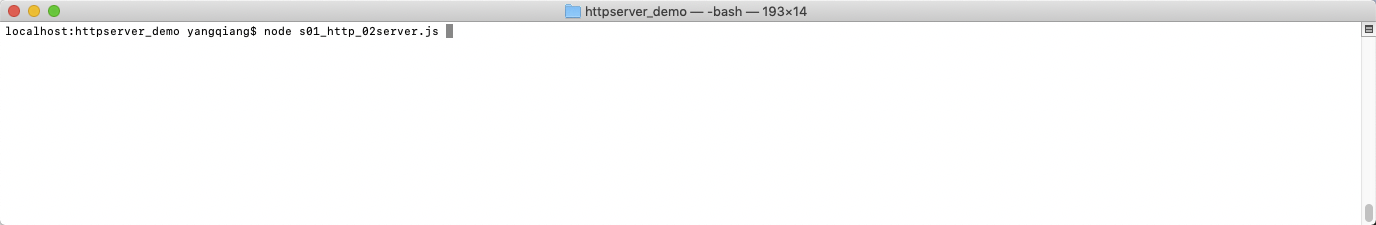

## 使用浏览器访问

- 在地址栏输入：
    - `http://127.0.0.1:9999/index.html`
    - 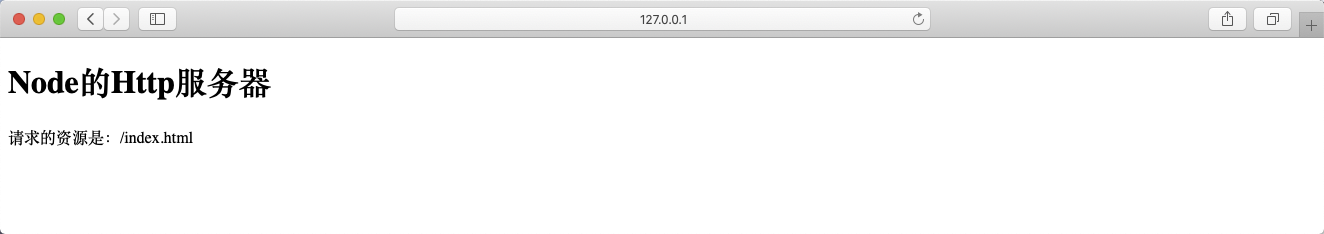

## 动态加载本地资源

- 使用fs模块读取文件，然后原封不动发送到浏览器;
    - 如果请求index.html就发送文件内容，否则就发送固定内容；

### 服务器代码 

```javascript
    var http = require("http");
    var url = require("url");
    var fs = require("fs");

    // 创建Web服务器
    var server = http.createServer( 
        function (request, response){  
            // 解析请求，得到请求的资源名
            var pathname = url.parse(request.url).pathname;
            console.log(pathname);
            if (pathname == "/index.html"){
                // 读取文件，使用异步回调（去掉/）
                fs.readFile(
                    "./s02_http_01res.html", 
                    function (err, data){
                        // 处理读取的数据
                        if (err) {
                            // 发送404状态码到浏览器
                            response.writeHead(404, {'Content-Type': 'text/html'});
                         }else{             
                            // 发送请求成功状态码200到浏览器
                            response.writeHead(200, {'Content-Type': 'text/html'});    
                            // 发送文件内容到浏览器
                            response.write(data.toString());        
                         }
                         //  发送响应数据
                         response.end();
                    }
                );
            }
            else{
                response.writeHead(200, {'Content-Type': 'text/html'});
                response.write("<!DOCTYPE html>");
                response.write("<html>");
                response.write("<head>");
                response.write("<title>使用http提供Web服务</title>");
                response.write("<meta charset='utf-8'>");
                response.write("<link rel='shortcut icon' href=\"#\" />");
                response.write("</head>");
                response.write("<body>");
                response.write("<h1>Node的Http服务器</h1>");
                response.write("<p>请求的资源是：");
                response.write(pathname.toString());    
                response.write("</p>");
                response.write("</body>");
                response.write("</html>");
                // 发送服务数据
                response.end();
            }

        }
    );
    server.listen(9999);
    // 控制台会输出以下信息
    console.log('Server running at http://127.0.0.1:9999/');

```

### 资源文件

```HTML
    <!DOCTYPE html>
    <html>
        <head>
            <title>
                使用http提供Web服务
            </title>
            <meta charset="utf-8">
            <link rel="shortcut icon" href="#" />
        </head>
        <body>
            <h1>Node的Http服务器</h1>
            <p style="background-color:red;">
                从文件加载的资源
            </p>
        </body>
    </html>

```

# 说明

1. 上面程序的两个方面：

    1. 使用资源加载的好处：
        - 容易把UI设计分离开来；
    2. 使用资源加载的问题：
        - 服务器的数据不能显示在页面上。
        
2. 新的思路：Node的Web框架封装的基础基础与理论
    1. 上面的模式是固定的，适合模块封装形成框架；
    2. 需要解决资源文件与服务器逻辑分离，服务器数据显示在页面上的问题。

3. Node的HTTP服务器部署到Apache
    - 上面这个程序无法直接部署到Apache，只能使用Apache创建一个代理。创建的代理方式有：
        - 正向代理
        - 反向代理
    - 如果想直接支持，需要与Apache的接口，这个可以通过标准的CGI来完成：
        - CGI的Node实现可以选择CGI-NODE，官网地址：`http://www.cgi-node.org`

- 备注：
    - 关于Apache的代理配置，可以参考官方文档与其他教程；
        - 后面在适当的地方再详细说明。
    - 把NodeJS的HTTP服务器配置成Apache代理，可以解决NodeJS单线程的问题；

----